In [11]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
import sys
from os import path
sys.path.insert(0, "../../ISANet/")
sys.path.insert(0, "../../experiments/")

from utils import optimize_monk_f, print_result, print_ls_result, save_csv
from isanet.optimizer import NCG, LBFGS
import matplotlib.pyplot as plt
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Monk3 seed 353

In [12]:
monk     =  "3"
reg      =  1e-4
seed     =  353
results  =  []
ng_eps   =  1e-7
l_eps    =  1e-7
max_iter =  1000
verbose  =  0

In [13]:
#############################
#     NCG hs
#############################
beta_method = "hs" 
c1          = 1e-4 
c2          = .1 
restart     = None 
ln_maxiter  = 100
#############################
optimizer = NCG(beta_method=beta_method, c1=c1, c2=c2, restart=restart, 
                ln_maxiter = ln_maxiter, norm_g_eps = ng_eps, l_eps = l_eps)
model_history, opt_history, time = optimize_monk_f(monk=monk, 
                                                   reg = reg, 
                                                   seed=seed, 
                                                   optimizer=optimizer, 
                                                   max_iter = max_iter, 
                                                   verbose = verbose)
print("NCG HS - results")
print_result(f="Monk"+monk, opt=("NCG "+beta_method).upper(), c1=c1, c2=c2, r=restart, m="-", history=model_history, opt_history=opt_history, time=time)
print_ls_result(ls_max_iter=ln_maxiter, opt_history=opt_history)
f_hs = model_history["loss_mse_reg"]
#############################
# save result
#############################
df = save_csv(path="./results/HS_HSP/m1-108_hs.csv", f="loss_mse_reg", model_history=model_history, opt_history=opt_history)

NCG HS - results
╒═══════╤═════════════╤════════╤══════╤═══════════╤═════╤════════╤══════════╤═══════════════╤════════════╕
│ f     │ Optimizer   │     c1 │   c2 │ restart   │ m   │   Loss │     ‖gk‖ │   Conv. Iter. │   Time (s) │
╞═══════╪═════════════╪════════╪══════╪═══════════╪═════╪════════╪══════════╪═══════════════╪════════════╡
│ Monk3 │ NCG HS      │ 0.0001 │  0.1 │           │ -   │ 0.0353 │ 9.31e-08 │           281 │       2.61 │
╘═══════╧═════════════╧════════╧══════╧═══════════╧═════╧════════╧══════════╧═══════════════╧════════════╛
╒════════════════╤════════════╤═══════════════╤═══════════════╕
│   Ls Max Iter. │   Ls Iter. │   Ls Hit Rate │   Ls Time (s) │
╞════════════════╪════════════╪═══════════════╪═══════════════╡
│            100 │       1520 │             1 │          2.03 │
╘════════════════╧════════════╧═══════════════╧═══════════════╛


In [14]:
#############################
#     NCG hs+
#############################
beta_method = "hs+" 
c1          = 1e-4 
c2          = .1 
restart     = None 
ln_maxiter  = 100
#############################
optimizer = NCG(beta_method=beta_method, c1=c1, c2=c2, restart=restart, 
                ln_maxiter = ln_maxiter, norm_g_eps = ng_eps, l_eps = l_eps)
model_history, opt_history, time = optimize_monk_f(monk=monk, 
                                                   reg = reg, 
                                                   seed=seed, 
                                                   optimizer=optimizer, 
                                                   max_iter = max_iter, 
                                                   verbose = verbose)
print("NCG HS-P - results")
print_result(f="Monk"+monk, opt=("NCG "+beta_method).upper(), c1=c1, c2=c2, r=restart, m="-", history=model_history, opt_history=opt_history, time=time)
print_ls_result(ls_max_iter=ln_maxiter, opt_history=opt_history)
f_hsp = model_history["loss_mse_reg"]
#############################
# save result
#############################
df = save_csv(path="./results/HS_HSP/m1-108_hsp.csv", f="loss_mse_reg", model_history=model_history, opt_history=opt_history)

NCG HS-P - results
╒═══════╤═════════════╤════════╤══════╤═══════════╤═════╤════════╤══════════╤═══════════════╤════════════╕
│ f     │ Optimizer   │     c1 │   c2 │ restart   │ m   │   Loss │     ‖gk‖ │   Conv. Iter. │   Time (s) │
╞═══════╪═════════════╪════════╪══════╪═══════════╪═════╪════════╪══════════╪═══════════════╪════════════╡
│ Monk3 │ NCG HS+     │ 0.0001 │  0.1 │           │ -   │ 0.0353 │ 9.07e-08 │           331 │       3.26 │
╘═══════╧═════════════╧════════╧══════╧═══════════╧═════╧════════╧══════════╧═══════════════╧════════════╛
╒════════════════╤════════════╤═══════════════╤═══════════════╕
│   Ls Max Iter. │   Ls Iter. │   Ls Hit Rate │   Ls Time (s) │
╞════════════════╪════════════╪═══════════════╪═══════════════╡
│            100 │       1785 │             1 │          2.56 │
╘════════════════╧════════════╧═══════════════╧═══════════════╛


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


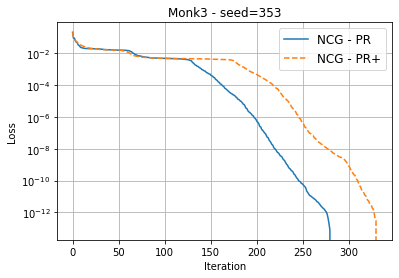

In [15]:
pos_train = (0,0)
figsize = (12, 4)

plt.plot(f_hs - f_hs[-1], linestyle='-')
plt.plot(f_hsp - f_hsp[-1], linestyle = '--')
plt.title('Monk'+monk+' - seed={}'.format(seed))
plt.ylabel("Loss")
plt.xlabel('Iteration')
plt.grid()
plt.yscale('log')
plt.legend(['NCG - PR','NCG - PR+'], loc='upper right', fontsize='large')   
plt.savefig('./results/HS_HSP/m{}-{}_hs_hsp.eps'.format(monk, seed), format='eps')
plt.show()